In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import collections
import os

colors = sns.color_palette('Set2', 20)

alphas=[0.001, 0.0001, 0.00001, 0.000001]
sns.set_context('poster')
sns.set_style('white')
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
sns.set_palette('Paired', 20)
import numpy
from numpy import sqrt
%matplotlib inline

In [3]:
lgn_fontsize = plt.rcParams['legend.fontsize']

In [4]:
backmapping_energies = collections.defaultdict(list)
fields = None
for f in sorted(filter(lambda x: x.endswith('xvg'), os.listdir('backmapping_energy/')), key=lambda x: int(x.split('_')[2].replace('.xvg', ''))):
    if not f.endswith('xvg'):
        continue
    alp = float(f.split('_')[1])
    d = np.loadtxt(os.path.join('backmapping_energy/', f), skiprows=1)
    fields = {x: k for k, x in enumerate(open(os.path.join('backmapping_energy/', f), 'r').readline().split())}
    backmapping_energies[alp].append(d)

# Backmapping

## Backmapping energy

In [26]:
pot_fields = [v for k, v in fields.items() if 'angle' in k or 'bond' in k or 'dih' in k or 'lj' in k or 'tab' in k]
angle_fields = [v for k, v in fields.items() if 'angle' in k]
bond_fields = [v for k, v in fields.items() if 'bond' in k]
dih_fields = [v for k, v in fields.items() if 'dih' in k]
nonbond_fields = [v for k, v in fields.items() if 'lj' in k or 'tab' in k]
tot_pot_fields = angle_fields + bond_fields + dih_fields + nonbond_fields

In [27]:
total_bond_energy7 = {}
total_angle_energy7 = {}
total_dih_energy7 = {}
total_nonbond_energy7 = {}
total_pot_energy7 = {}
for alp in backmapping_energies.keys():
    ss = []
    s = backmapping_energies[alp]
    for s1 in s:
        sum_f = np.sum(s1[:, bond_fields], axis=1)
        ss.append(np.column_stack((s1[:, fields['time']], sum_f)))
    total_bond_energy7[alp] = np.array(ss)
    
    ss = []
    for s1 in s:
        sum_f = np.sum(s1[:, angle_fields], axis=1)
        ss.append(np.column_stack((s1[:, fields['time']], sum_f)))
    total_angle_energy7[alp] = np.array(ss)
    
    ss = []
    for s1 in s:
        sum_f = np.sum(s1[:, dih_fields], axis=1)
        ss.append(np.column_stack((s1[:, fields['time']], sum_f)))
    total_dih_energy7[alp] = np.array(ss)
    
    ss = []
    for s1 in s:
        sum_f = np.sum(s1[:, nonbond_fields], axis=1)
        ss.append(np.column_stack((s1[:, fields['time']], sum_f)))
    total_nonbond_energy7[alp] = np.array(ss)
    
    ss = []
    for s1 in s:
        sum_f = np.sum(s1[:, tot_pot_fields], axis=1)
        ss.append(np.column_stack((s1[:, fields['time']], sum_f)))
    total_pot_energy7[alp] = np.array(ss)

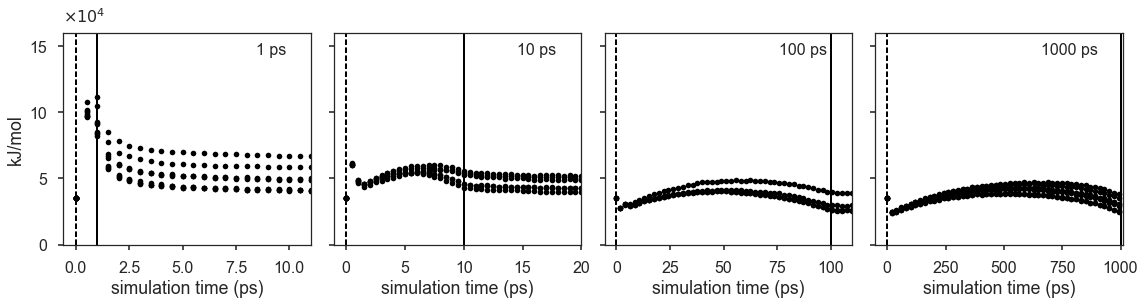

In [18]:
plt.rcParams['figure.figsize'] = (16, 4)
ymin, ymax, ystep = 0, 165000, 50000
m = 10**4
for i, alp in enumerate(sorted(backmapping_energies.keys(), reverse=True), 1):
    plt.subplot(1,4,i)
    for j, s in enumerate(total_pot_energy7[alp]):
        if (j in [4,6,8] and alp == 0.0001) or (j in [0,1,4,5,8] and alp == 0.00001) or (j in [1, 6] and alp == 0.000001):
            continue
        mm = int(math.ceil(s[:, 0].shape[0]/50.0))
        l, = plt.plot(s[:, 0], s[:, 1]/m, 'k.', markevery=mm)
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.9, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize, ha='right')
    plt.axvline(x=0, linewidth=2.0, linestyle='--', color='k')
    plt.axvline(x=0+(1.0/alp/1000), linewidth=2.0, linestyle='-', color='k')
    plt.xlim(xmax=10+(1.0/alp/1000))
    yticks = np.arange(ymin/m, ymax/m, ystep/m)
    plt.ylim([ymin/m, ymax/m])
    if i == 1:
        plt.ylabel('kJ/mol')
        plt.annotate(r'$\times 10^4$'.format(m), xy=(0, 1.05), xycoords='axes fraction', fontsize=lgn_fontsize)
        plt.yticks(yticks, yticks)
    else:        
        plt.yticks(yticks, [])
    plt.xlabel('simulation time (ps)')

plt.tight_layout()
plt.savefig('ua_potential_bck.pdf', dpi=200, bbox_inches='tight')

# Equilibration

In [2]:
gmx_pot_energy = collections.defaultdict(list)
for f in sorted(os.listdir('eq_energy/'), key=lambda x: int(x.split('_')[2].replace('.xvg', '')) if x.endswith('xvg') else -1):
    if f.endswith('xvg'):
        alpha = float(f.split('_')[1])
        d = np.loadtxt(os.path.join('eq_energy', f), comments=('@', '#'))
        gmx_pot_energy[alpha].append(d)

In [4]:
eq_header = {
    'time': 0,
    "bond": 1,
    "angle": 2,
    "propdih": 3,
    "rb_dih": 4,
    "lj-14": 5,
    "coulomb-14": 6,
    "lj": 7, 
    "coulomb": 8,
    "potential": 10
}

In [9]:
RT = 0.0083144621 * 298.0
print(20624 / (13540*RT))

0.6147574685457341


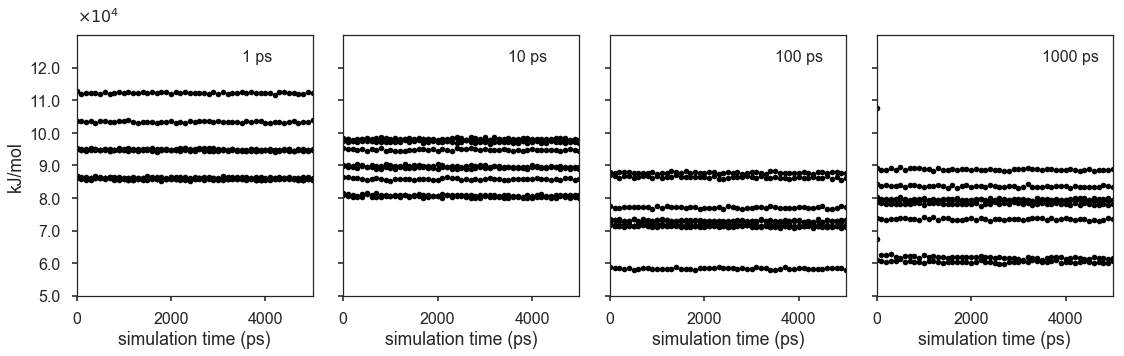

In [8]:
plt.rcParams['figure.figsize'] = (16, 5)
pot = 'potential'
ymin, ymax, ystep = 50000, 130000, 10000
m = 10**4
for i, (alp, l) in enumerate(sorted(gmx_pot_energy.items(), reverse=True), 1):
    plt.subplot(1,4,i)
    for s in l:
        k, = plt.plot(s[:, 0], s[:, eq_header[pot]]/m, 'k.', markevery=100)
    l = np.array(l)
    avg_pot = np.average(l, axis=0)[:, eq_header[pot]]
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    #plt.annotate(r'$\langle E_{{{}}} \rangle = {:.2f} \; kJ/mol$'.format(pot, np.average(avg_pot)), 
    #             fontsize=lgn_fontsize,  xy=(0.05, 0.02), xycoords='axes fraction')
    plt.xlim([0, 5000])
    yticks = np.arange(ymin/m, ymax/m, ystep/m)
    plt.ylim([ymin/m, ymax/m])
    if i == 1:
        plt.ylabel('kJ/mol')
        plt.annotate(r'$\times 10^4$'.format(m), xy=(0, 1.05), xycoords='axes fraction', fontsize=lgn_fontsize)
        plt.yticks(yticks, yticks)
    else:        
        plt.yticks(yticks, [])
    plt.xlabel('simulation time (ps)')        
    
plt.tight_layout()
plt.savefig('ua_eq_potential.pdf', dpi=200, bbox_inches='tight')

0.001 3.15427401743 0.364253369071 1.10226196459
0.0001 3.01867270544 0.273329117475 0.733271941144
1e-05 2.37295356357 0.35955837918 1.29265199454
1e-06 2.24635034668 0.564962332971 1.89233036585


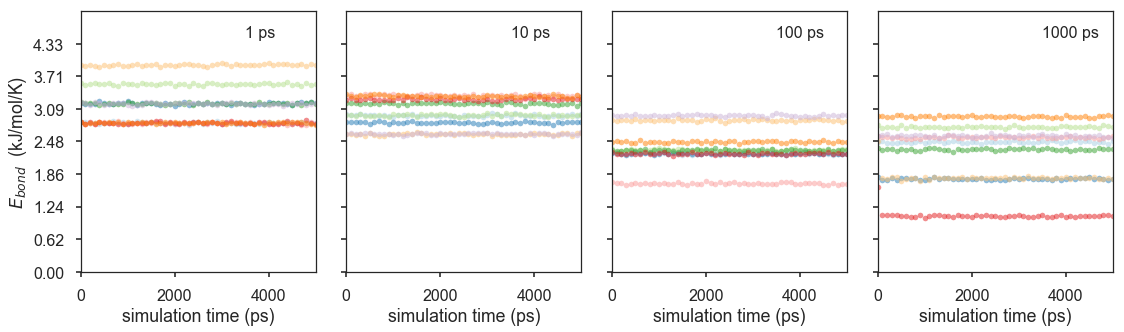

In [34]:
plt.rcParams['figure.figsize'] = (16, 5)
pot = 'bond'
ymin, ymax, ystep = 0, 80000, 10000
m = RT*6521
for i, (alp, l) in enumerate(sorted(gmx_pot_energy.items(), reverse=True), 1):
    plt.subplot(1,4,i)
    e_vals = []
    for s in l:
        e_vals.append(np.average(s[:, eq_header[pot]]))
        k, = plt.plot(s[:, 0], s[:, eq_header[pot]]/m, '.', markevery=100, alpha=0.5)
    print(alp, np.average(e_vals)/m, np.std(e_vals)/m, (np.max(e_vals)-np.min(e_vals))/m)
    l = np.array(l)
    avg_pot = np.average(l, axis=0)[:, eq_header[pot]]
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    #plt.annotate(r'$\langle E_{{{}}} \rangle = {:.2f} \; kJ/mol$'.format(pot, np.average(avg_pot)), 
    #             fontsize=lgn_fontsize,  xy=(0.05, 0.02), xycoords='axes fraction')
    plt.ylim([ymin/m, ymax/m])
    yticks = np.arange(ymin/m, ymax/m, ystep/m)
    if i == 1:
        plt.ylabel(r'$E_{{{}}}$  (kJ/mol/K)'.format(pot))
        #plt.annotate(r'$\times 10^4$'.format(m), xy=(0, 1.05), xycoords='axes fraction', fontsize=lgn_fontsize)
        plt.yticks(yticks, map('{:.2f}'.format, yticks))
    else:        
        plt.yticks(yticks, [])
    plt.xlim([0, 5000])
    plt.xlabel('simulation time (ps)')        
    
plt.tight_layout()
plt.savefig('ua_eq_{}.pdf'.format(pot), dpi=200, bbox_inches='tight')

0.001 0.877177916047 0.00817807756276 0.0231571455407
0.0001 0.87532327856 0.013709107697 0.0399813996548
1e-05 0.843431091419 0.0087608230201 0.0322039913163
1e-06 0.847376567985 0.0241080622766 0.0658509018336


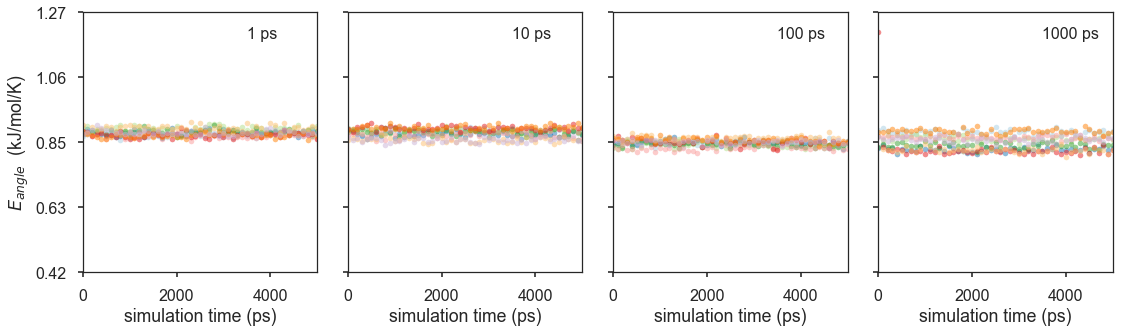

In [38]:
plt.rcParams['figure.figsize'] = (16, 5)
pot = 'angle'
ymin, ymax, ystep = 10000, 30000, 5000
m = 9537*RT
for i, (alp, l) in enumerate(sorted(gmx_pot_energy.items(), reverse=True), 1):
    plt.subplot(1,4,i)
    e_vals = []
    for s in l:
        e_vals.append(np.average(s[:, eq_header[pot]]))
        k, = plt.plot(s[:, 0], s[:, eq_header[pot]]/m, '.', markevery=100, alpha=0.5)
    print(alp, np.average(e_vals)/m, np.std(e_vals)/m, (np.max(e_vals)-np.min(e_vals))/m)
    l = np.array(l)
    avg_pot = np.average(l, axis=0)[:, eq_header[pot]]
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    #plt.annotate(r'$\langle E_{{{}}} \rangle = {:.2f} \; kJ/mol$'.format(pot, np.average(avg_pot)), 
    #             fontsize=lgn_fontsize,  xy=(0.05, 0.02), xycoords='axes fraction')
    plt.ylim([ymin/m, ymax/m])
    yticks = np.arange(ymin/m, ymax/m, ystep/m)
    if i == 1:
        plt.ylabel(r'$E_{{{}}}$  (kJ/mol/K)'.format(pot))
        #plt.annotate(r'$\times 10^4$'.format(m), xy=(0, 1.05), xycoords='axes fraction', fontsize=lgn_fontsize)
        plt.yticks(yticks, map('{:.2f}'.format, yticks))
    else:        
        plt.yticks(yticks, [])
    plt.xlim([0, 5000])
    plt.xlabel('simulation time (ps)')         
    
plt.tight_layout()
plt.savefig('ua_eq_{}.pdf'.format(pot), dpi=200, bbox_inches='tight')

0.001 0.327674104289 0.00150380853062 0.00467852012043
0.0001 0.327466259252 0.00131381488113 0.0048482617626
1e-05 0.326502185922 0.00210127462918 0.0063612296251
1e-06 0.324841686737 0.00397725674238 0.0129555406983


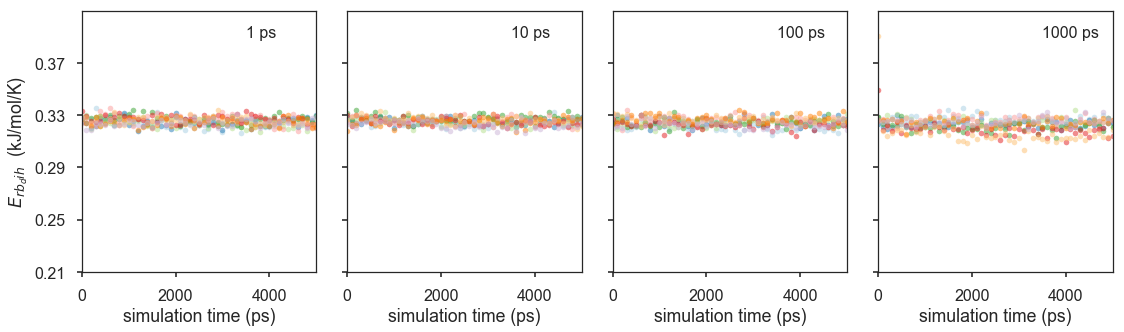

In [37]:
plt.rcParams['figure.figsize'] = (16, 5)
pot = 'rb_dih'
ymin, ymax, ystep = 5000, 10000, 1000
m = 9720*RT
for i, (alp, l) in enumerate(sorted(gmx_pot_energy.items(), reverse=True), 1):
    plt.subplot(1,4,i)
    e_vals = []
    for s in l:
        e_vals.append(np.average(s[:, eq_header[pot]]))
        k, = plt.plot(s[:, 0], s[:, eq_header[pot]]/m, '.', markevery=100, alpha=0.5)
    print(alp, np.average(e_vals)/m, np.std(e_vals)/m, (np.max(e_vals)-np.min(e_vals))/m)
    l = np.array(l)
    avg_pot = np.average(l, axis=0)[:, eq_header[pot]]
    plt.annotate('{:.0f} ps'.format(1/alp/1000), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=lgn_fontsize)
    #plt.annotate(r'$\langle E_{{{}}} \rangle = {:.2f} \; kJ/mol$'.format(pot, np.average(avg_pot)), 
    #             fontsize=lgn_fontsize,  xy=(0.05, 0.02), xycoords='axes fraction')
    plt.ylim([ymin/m, ymax/m])
    yticks = np.arange(ymin/m, ymax/m, ystep/m)
    if i == 1:
        plt.ylabel(r'$E_{{{}}}$  (kJ/mol/K)'.format(pot))
        #plt.annotate(r'$\times 10^4$'.format(m), xy=(0, 1.05), xycoords='axes fraction', fontsize=lgn_fontsize)
        plt.yticks(yticks, map('{:.2f}'.format, yticks))
    else:        
        plt.yticks(yticks, [])
    plt.xlim([0, 5000])
    plt.xlabel('simulation time (ps)')        
    
plt.tight_layout()
plt.savefig('ua_eq_{}.pdf'.format(pot), dpi=200, bbox_inches='tight')

# RDF

In [20]:
rdfs = collections.defaultdict(dict) # at_name: alpha: rdfs
for f in sorted(os.listdir('rdf')):
    if f.endswith('xvg'):
        t = f.split('_')
        at_name = '_'.join(t[3:]).replace('.xvg', '')
        d = np.loadtxt(os.path.join('rdf', f), comments=('@', '#'), usecols=(0,1))
        alpha = float(t[2])
        if alpha not in rdfs[at_name]:
            rdfs[at_name][alpha] = []
        np.savetxt(os.path.join('rdf', f), d)
        rdfs[at_name][alpha].append(d)
print(rdfs.keys())

dict_keys(['C_N', 'C_N_excl', 'C_O', 'ring-ring'])


In [21]:
def smooth(x,window_len=11,window='hanning'):
    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y


In [22]:
at_name = 'C_O'
avg_rdf_CO = {}

for i, (alpha, l) in enumerate(sorted(rdfs[at_name].items(), reverse=True), 1):
    avg_l = np.average(l, axis=0)
    std_l = np.std(l, axis=0)
    s = np.zeros((avg_l.shape[0], avg_l.shape[1]+1))
    s[:, (0, 1)] = avg_l
    s[:, 2] = std_l[:, 1]
    avg_rdf_CO[alpha] = s

at_name = 'C_N'
avg_rdf_CN = {}

for i, (alpha, l) in enumerate(sorted(rdfs[at_name].items(), reverse=True), 1):
    avg_l = np.average(l, axis=0)
    std_l = np.std(l, axis=0)
    s = np.zeros((avg_l.shape[0], avg_l.shape[1]+1))
    s[:, (0, 1)] = avg_l
    s[:, 2] = std_l[:, 1]
    avg_rdf_CN[alpha] = s
    
avg_rdfs = collections.defaultdict(dict)
for at_name in rdfs:
    for i, (alpha, l) in enumerate(sorted(rdfs[at_name].items(), reverse=True), 1):
        avg_l = np.average(l, axis=0)
        std_l = np.std(l, axis=0)
        s = np.zeros((avg_l.shape[0], avg_l.shape[1]+1))
        s[:, (0, 1)] = avg_l
        s[:, 2] = std_l[:, 1]
        avg_rdfs[at_name][alpha] = s

1e-06 1e-05 0.035698210344
1e-06 0.0001 0.0354996712988
1e-06 0.001 0.0388410826608
1e-05 0.0001 0.0169750790708
1e-05 0.001 0.0193614952998
0.0001 0.001 0.00654449368109
0.0254866720592


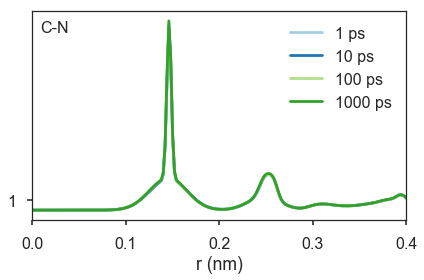

In [23]:
plt.rcParams['figure.figsize'] = (6, 4)
at_name = 'C_N'
for alp, d in sorted(avg_rdfs[at_name].items(), reverse=True):
    plt.plot(d[:, 0], d[:, 1], label='{:.0f} ps'.format(1.0/alp/1000))
    plt.xlim([0, 0.6])
# Calculate average RMSE between structures
alps = sorted(avg_rdfs[at_name].keys())
rmses = []
for a1 in range(len(alps)):
    d1 = smooth(avg_rdfs[at_name][alps[a1]][:, 1])
    for a2 in range(a1+1, len(alps)):
        d2 = smooth(avg_rdfs[at_name][alps[a2]][:, 1])
        rmse = sqrt(np.average(pow(d2-d1, 2)))
        rmses.append(rmse)
        print(alps[a1], alps[a2], rmse)
print(np.average(rmses))
plt.legend(loc=0)
plt.yticks([1])
plt.xlim([0.0, 0.4])
plt.annotate(at_name.replace('_', '-'), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=16)
plt.xlabel('r (nm)')
plt.tight_layout()
plt.savefig('ua_rdf_{}.pdf'.format(at_name), dpi=200, bbox_inches='tight')

1e-06 1e-05 0.00777720897391
1e-06 0.0001 0.00849369046868
1e-06 0.001 0.00828690895825
1e-05 0.0001 0.00708907610341
1e-05 0.001 0.00813724986657
0.0001 0.001 0.00656648179222
0.00772510269384


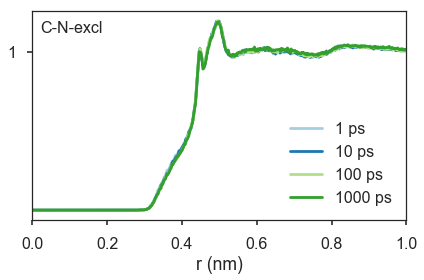

In [24]:
plt.rcParams['figure.figsize'] = (6, 4)
at_name = 'C_N_excl'
for alp, d in sorted(avg_rdfs[at_name].items(), reverse=True):
    plt.plot(d[:, 0], d[:, 1], '-', label='{:.0f} ps'.format(1.0/alp/1000))
    #plt.xlim([0, 0.6])
# Calculate average RMSE between structures
alps = sorted(avg_rdfs[at_name].keys())
rmses = []
for a1 in range(len(alps)):
    d1 = avg_rdfs[at_name][alps[a1]]
    for a2 in range(a1+1, len(alps)):
        d2 = avg_rdfs[at_name][alps[a2]]
        rmse = sqrt(np.average(pow(d2[:, 1]-d1[:, 1], 2)))
        rmses.append(rmse)
        print(alps[a1], alps[a2], rmse)
print(np.average(rmses))
plt.legend(loc=4)
plt.yticks([1])
plt.xlim([0.0, 1.0])
plt.annotate(at_name.replace('_', '-'), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=16)
plt.xlabel('r (nm)')
plt.tight_layout()
plt.savefig('ua_rdf_{}.pdf'.format(at_name), dpi=200, bbox_inches='tight')

1e-06 1e-05 0.0290895351344
1e-06 0.0001 0.0240579190719
1e-06 0.001 0.0240432910388
1e-05 0.0001 0.0140412889865
1e-05 0.001 0.0261749518552
0.0001 0.001 0.0202441069786
0.0229418488442


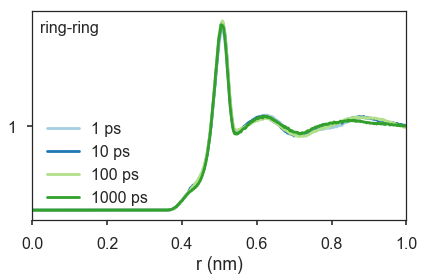

In [25]:
plt.rcParams['figure.figsize'] = (6, 4)
at_name = 'ring-ring'
for alp, d in sorted(avg_rdfs[at_name].items(), reverse=True):
    plt.plot(d[:, 0], d[:, 1], label='{:.0f} ps'.format(1.0/alp/1000))
    plt.xlim([0, 1])
plt.legend(loc=3)
rmses = []
for a1 in range(len(alps)):
    d1 = avg_rdfs[at_name][alps[a1]]
    for a2 in range(a1+1, len(alps)):
        d2 = avg_rdfs[at_name][alps[a2]]
        rmse = sqrt(np.average(pow(d2[:, 1]-d1[:, 1], 2)))
        rmses.append(rmse)
        print(alps[a1], alps[a2], rmse)
print(np.average(rmses))
plt.yticks([1])
plt.annotate(at_name.replace('_', '-'), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=16)
plt.xlabel('r (nm)')
plt.tight_layout()
plt.savefig('ua_rdf_{}.pdf'.format(at_name), dpi=200, bbox_inches='tight')

# Pull mechanism

In [2]:
pull_data = collections.defaultdict(dict)
for f in os.listdir('pull/'):
    if f.endswith('xvg'):
        direction = f.split('_')[1]
        alpha = float(f.split('_')[2])
        d = np.loadtxt(os.path.join('pull', f), comments=('@', '#'))
        if direction not in pull_data[alpha]:
            pull_data[alpha][direction] = []
        pull_data[alpha][direction].append(d)

In [3]:
import statsmodels.api as sm

def linregress(x, y, w=None):
    ret_tuple = collections.namedtuple('ret', ['slope', 'intercept', 'rvalue', 'std_intercept', 'std_slope'])
    X = sm.add_constant(x)
    if w is None:
        model = sm.OLS(y, X)
    else:
        model = sm.WLS(y, X, weights=1.0/w)
    result = model.fit()
    perr = np.sqrt(result.cov_params())
    out_vals = [result.params[1], result.params[0], np.sqrt(result.rsquared), perr[0][0], perr[1][1]]
    return ret_tuple(*out_vals)

In [4]:
def smooth(x,window_len=11,window='hanning'):
    if x.ndim != 1:
        raise ValueError, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError, "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=numpy.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y


0.001 2.78 0.23
0.0001 2.60 0.23
1e-05 2.60 0.23
1e-06 2.43 0.23


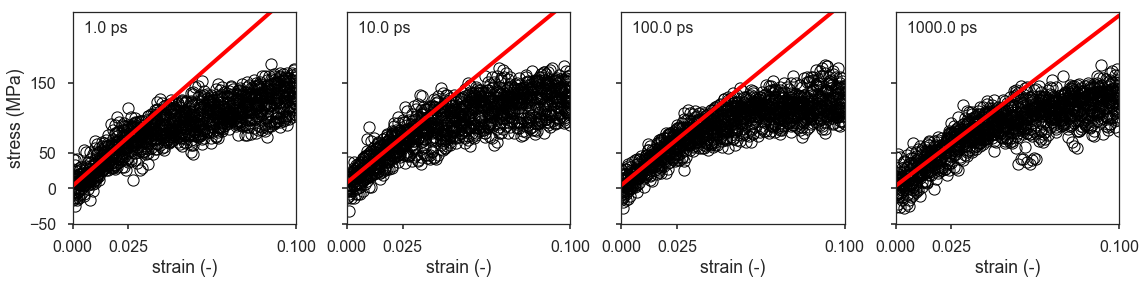

In [14]:
plt.rcParams['figure.figsize'] = (16, 4)
direction_index = {
    'x': (1, 4),
    'y': (2, 5),
    'z': (3, 6)
}
max_strain = 0.025
ymin, ymax = -50, 250
young_modulus = collections.defaultdict(dict)
for i, (alp, l) in enumerate(sorted(pull_data.items(), reverse=True), 1):
    plt.subplot(1,4,i)
    slopes, slopes_var, intercepts = [], [], []
    for direction, ll in l.items():
        ss, vv = [], []
        for s in ll:
            strain0 = s[:, direction_index[direction][0]][0]
            strain = (s[:, direction_index[direction][0]] - strain0)/strain0
            strain_limit = np.where(strain<=max_strain)[0][-1]
            stress = -1*s[:, direction_index[direction][1]]/10
            r1 = linregress(strain[:strain_limit], stress[:strain_limit])
            slopes.append(r1.slope)
            slopes_var.append(r1.std_slope**2)
            intercepts.append(r1.intercept)
            plt.plot(
                strain, 
                smooth(stress, window_len=200)[:strain.shape[0]], 
                label=direction, 
                marker='o', 
                linestyle='None', 
                color='k', 
                markerfacecolor='None', 
                markeredgewidth=1.0, markevery=100)
            ss.append(r1.slope)
            vv.append(r1.std_slope**2)
        young_modulus[alp][direction] = (np.average(ss), np.average(vv))
    plt.plot(strain, np.average(slopes)*strain+np.average(intercepts), 'r-', linewidth=4.0)
    #print alp, np.sqrt(np.average(np.array(slopes_var)))/1000
    print alp, '{:.2f} {:.2f}'.format(
        np.average(slopes, weights=1.0/np.array(slopes_var))/1000, np.sqrt(np.average(slopes_var))/1000)
    l = np.array(l)
    plt.annotate(
        '{} ps'.format(1/alp/1000), 
        xy=(0.05, 0.9), 
        xycoords='axes fraction', 
        fontsize=lgn_fontsize,
        horizontalalignment='left')
    plt.xlabel('strain (-)')
    if i == 1:
        plt.ylabel('stress (MPa)')
        plt.yticks(range(ymin, ymax, 100)+[0])
    else:
        plt.yticks(range(ymin, ymax, 100)+[0], [])
    plt.xticks([0.0, max_strain, 0.1])
    plt.xlim(xmin=0, xmax=0.1)
    plt.ylim([ymin, ymax])
    
plt.tight_layout()
plt.savefig('ua_pull_test.pdf', dpi=200)

In [13]:
for alp, l in sorted(young_modulus.items(), reverse=True):
    for d, v in sorted(l.items()):
        print alp, d, '{:.4f} {:.4f}'.format(v[0]/1000, np.sqrt(v[1])/1000)

0.001 x 2.8677 0.2286
0.001 y 3.1829 0.2344
0.001 z 2.2869 0.2258
0.0001 x 1.9378 0.2318
0.0001 y 3.2195 0.2332
0.0001 z 2.6480 0.2241
1e-05 x 2.7017 0.2331
1e-05 y 2.3670 0.2333
1e-05 z 2.7227 0.2320
1e-06 x 2.1259 0.2332
1e-06 y 2.8375 0.2297
1e-06 z 2.2787 0.2285


# Free volume

In [126]:
free_volume = collections.defaultdict(list)
for f in os.listdir('free_volume/'):
    if f.endswith('xvg'):
        alpha = float(f.split('_')[1])
        d = np.loadtxt(os.path.join('free_volume', f), comments=('@', '#'))
        free_volume[alpha].append(d)

(0.001, 43.476882900864936, 0.20636485171411539)
(0.0001, 43.488694167221112, 0.23833568584585774)
(1e-05, 43.266504990019961, 0.21014326299449823)
(1e-06, 44.62053115990242, 2.237972554121006)


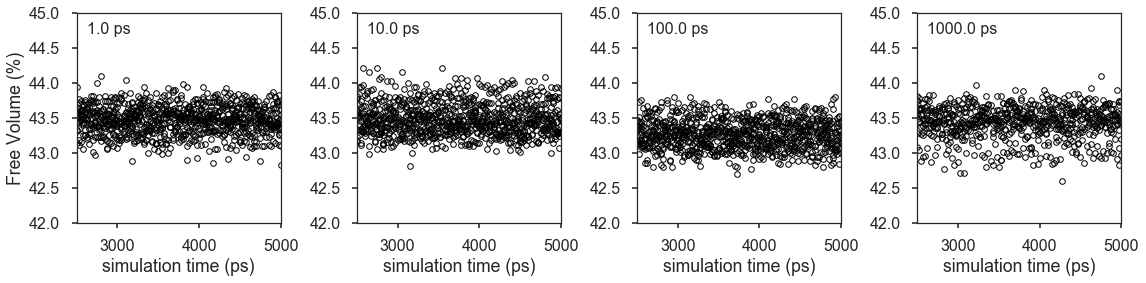

In [141]:
plt.rcParams['figure.figsize'] = (16, 4)
for i, (alp, l) in enumerate(sorted(free_volume.items(), reverse=True), 1):
    plt.subplot(1,4,i)
    for s in l:
        k, = plt.plot(
                s[:, 0], 
                s[:, 1], 
                marker='.', 
                color='k',
                linestyle='None', 
                markerfacecolor='None', 
                markeredgewidth=1.0, 
                markevery=5)
    plt.annotate(
        '{} ps'.format(1/alp/1000), 
        xy=(0.05, 0.9), 
        xycoords='axes fraction', 
        fontsize=lgn_fontsize,
        horizontalalignment='left')
    avg_val = np.average(np.array(l)[:, :, 1])
    std_val = np.std(np.array(l)[:, :, 1])
    print(alp, avg_val, std_val)
    plt.xlabel('simulation time (ps)')     
    plt.ylim([42, 45])
    plt.xlim([2500, 5000])
    if i == 1:
        plt.ylabel('Free Volume (%)')
plt.tight_layout()
plt.savefig('ua_freevolume.pdf', dpi=200)

# Histogram of C_N bonds (cross-linked)

In [16]:
hist_files = collections.defaultdict(list)
for hist in os.listdir('cr_bonds/'):
    if hist.endswith('xvg'):
        alpha = float(hist.split('_')[3])
        d = np.loadtxt(os.path.join('cr_bonds', hist), comments=('@', '#'))
        hist_files[alpha].append(d)
avg_hist = {}
for alp, l in hist_files.items():
    avg_l = np.average(l, axis=0)
    std_l = np.std(l, axis=0)
    s = np.zeros((avg_l.shape[0], avg_l.shape[1]+1))
    s[:, (0, 1)] = avg_l
    s[:, 2] = std_l[:, 1]
    avg_hist[alp] = s

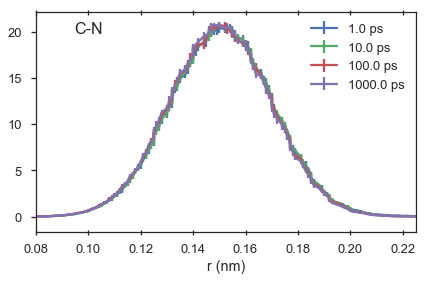

In [32]:
plt.rcParams['figure.figsize'] = (6, 4)
for alp, d in sorted(avg_hist.items(), reverse=True):
    plt.errorbar(d[:, 0], d[:, 1], d[:, 2], label='{} ps'.format(1.0/alp/1000))
    plt.xlim([0, 0.6])
plt.legend(loc=0)
plt.annotate('C-N', xy=(0.1, 0.9), xycoords='axes fraction', fontsize=16)
plt.xlabel('r (nm)')
plt.xlim([0.08, 0.225])
plt.tick_params(axis='x', direction='inout', length=5, bottom=True, top=True)
plt.tight_layout()
plt.savefig('ua_cn_hist.pdf', dpi=200)